<a href="https://colab.research.google.com/github/khalidakram07/Real-Estate/blob/khalid/realestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
#1
import numpy as np
from sklearn.model_selection import train_test_split

In [241]:
#2
!pip install -U -q PyDrive
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1jnd9kqvJaIuAIP0S1biVHrGMq_mK3GzO"}) 
downloaded.GetContentFile('apartments_for_rent_classified_10K.xlsx')  
#df = pd.read_csv('apartments_for_rent_classified_10K.xlsx')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

# **Data collection and cleaning**

In [242]:
#3
from pandas import read_excel
my_sheet = 'apartments_for_rent_classif (2)' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'apartments_for_rent_classified_10K.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
df.head() # shows headers with top 5 rows

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,1577359401


# **STEP 2: Finding missing data**


In [243]:
#4
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

Using isnull().sum on dataframe object df we find all missing values. We have Amenities=3549,Bathrooms=33,Bedrooms, Pet_allowed=1745, address=3325, cityname=77, state=77, latitute=10,longitude=10.


In [244]:
#5
#Total no of rows missing
sum(df.isnull().any(axis=1))

6457

In [245]:
#6
#checking missing values in column amenities
# creating bool series True for NaN values 
bool_series = pd.isnull(df["amenities"]) 
	
# filtering data 
# displaying data only with amenities = NaN 
df[bool_series] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5659917503,housing/rent/apartment,Four BR 17595 Burl Oak Court,"This unit is located at 17595 Burl Oak Court, ...",NaN,5,4,USD,No,Thumbnail,None,4500,"$4,500",Monthly,5407,17595 Burl Oak CT,Eden Prairie,MN,45,-93,RentLingo,1576667692
9994,5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,This unit is located at 2536 W Canyon Ridge Rd...,NaN,4,6,USD,No,Thumbnail,None,3000,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37,-114,RentLingo,1577017103
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4,5,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,45,-93,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8,6,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34,-120,RentLingo,1577360419


In [246]:
#7
#checking missing values in column cityname           
# creating bool series True for NaN values 
nan_city_name = pd.isnull(df["cityname"]) 
	
# filtering data 
# displaying data only with Gender = NaN 
df[nan_city_name] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
22,5664567303,housing/rent/apartment,One BR Leeward Ct,"This unit is located at Leeward Ct, Fleming Is...",NaN,1,1,USD,No,Thumbnail,None,525,$525,Monthly,200,NaN,NaN,NaN,nan,nan,RentLingo,1577014825
31,5668619369,housing/rent/apartment,One BR Mullica Way,"This unit is located at Mullica Way, Devonshir...",Pool,1,1,USD,No,Thumbnail,None,750,$750,Monthly,219,NaN,NaN,NaN,nan,nan,RentLingo,1577358921
37,5664573404,housing/rent/apartment,One BR New Providence Dr Apartment 90,This unit is located at New Providence Dr Apar...,NaN,1,1,USD,No,Thumbnail,None,750,$750,Monthly,220,NaN,NaN,NaN,nan,nan,RentLingo,1577015212
76,5664574093,housing/rent/apartment,One BR 8th Avenue North,"This unit is located at eighth Avenue North, O...",NaN,1,1,USD,No,Thumbnail,None,1025,"$1,025",Monthly,250,8th Ave North,NaN,NaN,40,-99,RentLingo,1577015259
161,5668622658,housing/rent/apartment,One BR Hinson Ave,"This unit is located at Hinson Ave, Haines, 33...",Pool,1,1,USD,No,Thumbnail,None,625,$625,Monthly,250,NaN,NaN,NaN,nan,nan,RentLingo,1577359130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,5664596769,housing/rent/apartment,"Two BR 1833 Lombard St, Unit B","This unit is located at 1833 Lombard St, Unit ...",NaN,1,2,USD,No,Thumbnail,None,2095,"$2,095",Monthly,1650,1833 Lombard St Unit B,NaN,NaN,40,-99,RentLingo,1577017017
9259,5664597711,housing/rent/apartment,Two BR Lakeside Blvd,"This unit is located at Lakeside Blvd, Shelby ...",NaN,2,2,USD,No,Thumbnail,"Cats,Dogs",1650,"$1,650",Monthly,1665,NaN,NaN,NaN,nan,nan,RentLingo,1577017108
9542,5668624794,housing/rent/apartment,Five BR 22 Austin Street,"This unit is located at 22 Austin Street, Char...","Dishwasher,Parking,Patio/Deck,Refrigerator",2,5,USD,No,Thumbnail,None,4500,"$4,500",Monthly,1950,22 Austin St,NaN,NaN,40,-99,RentLingo,1577359268
9561,5668633890,housing/rent/apartment,Three BR 229 Delmont St #259,"This unit is located at 229 Delmont St #259, C...",NaN,2,3,USD,No,Thumbnail,"Cats,Dogs",1985,"$1,985",Monthly,1975,229 Delmont St #259,NaN,NaN,40,-99,RentLingo,1577359942


In [247]:
#(8)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21


In [248]:
#9
# Checking out the total unique categories in the dataset
np.unique(df['category'])

# Found that there are 3 unique categories ['housing/rent/apartment', 'housing/rent/home', 'housing/rent/short_term']

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [249]:
#10
# checking that what are the occurences of each unique categories in the dataset
df['category'].value_counts()
df.drop(index=df[df['category'] == 'housing/rent/short_term'].index, inplace=True)
df.drop(index=df[df['category'] == 'housing/rent/home'].index, inplace=True)
df['category'].value_counts()
del df['category']
print(df.head())

           id  ...                time
0  5668626895  ... 2019-12-26 11:23:35
1  5664597177  ... 2019-12-22 12:17:43
2  5668626833  ... 2019-12-26 11:23:30
3  5659918074  ... 2019-12-18 11:15:43
4  5668626759  ... 2019-12-26 11:23:21

[5 rows x 21 columns]


In [250]:
#11
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude
count,"9,996","9,963","9,989","9,996","9,996","9,986","9,986"
mean,"5,623,385,271",1,2,"1,487",946,38,-95
std,"70,221,786",1,1,"1,077",656,5,16
min,"5,508,654,087",1,0,200,101,21,-158
25%,"5,509,248,188",1,1,949,649,34,-101
50%,"5,668,609,611",1,2,"1,270",802,39,-94
75%,"5,668,626,453",2,2,"1,695","1,100",41,-82
max,"5,668,662,559",8,9,"52,500","40,000",62,-70


In [251]:
#12
df.shape

(9996, 21)

In [252]:
#13
df.tail(5)

,id,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
9995,5630240092,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4,5,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,45,-93,RentLingo,2019-11-30 11:22:55
9996,5668640983,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8,6,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34,-120,RentLingo,2019-12-26 11:40:19
9997,5668643292,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8,6,USD,No,Thumbnail,None,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39,-77,RentLingo,2019-12-26 11:42:40
9998,5668662559,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",nan,1,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,NaN,New York,NY,41,-74,Listanza,2019-12-26 12:09:46
9999,5509132540,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1,1,USD,No,No,NaN,1009,"$1,009",Monthly,880,NaN,Lawrenceville,GA,34,-84,RentDigs.com,2019-12-26 12:09:01


In [253]:
#14
np.unique(df['currency'])

array(['USD'], dtype=object)

**#Step3 : Visualize dataset for distribution by Constructing histograms, box plots, and scatter plots**


In [254]:
#15
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [255]:
#16
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

**after knowing out dataset including complete visualization we can start by dropping unncesary columns like time...**

In [256]:
'''
#20
del df['time']
df.head(5)
'''

"\n#20\ndel df['time']\ndf.head(5)\n"

Dropping address column as the same is avaiblbe in title 

In [257]:
#17
del df['address']
del df['amenities']
df.head(5)

,id,title,body,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35
1,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43
2,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
4,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21


Merging Title+cityname+state+latititute+longitude = Full_address

In [258]:
#18
df["Full_address"] = df["title"] + df["cityname"]

In [259]:
#19
df.head()

,id,title,body,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
0,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
1,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43,Studio apartment 814 Schutte RoadEvansville
2,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
4,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21,"Studio apartment Washington Blvd, N Cleveland ..."


In [260]:
#20
del df["title"] 


del df["body"]


deleting price display as it seem to be redundant

In [261]:
#21
del df["price_display"]

In [262]:
#22
df.head()

,id,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
0,5668626895,nan,0,USD,No,Thumbnail,None,790,Monthly,101,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
1,5664597177,nan,1,USD,No,Thumbnail,None,425,Monthly,106,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43,Studio apartment 814 Schutte RoadEvansville
2,5668626833,1,0,USD,No,Thumbnail,None,1390,Monthly,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,1,0,USD,No,Thumbnail,None,925,Monthly,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
4,5668626759,nan,0,USD,No,Thumbnail,None,880,Monthly,125,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21,"Studio apartment Washington Blvd, N Cleveland ..."


Converting latitute + longitute with column name GPS(KHALID)


In [263]:
#23-khalid
df
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1745
price              0
price_type         0
square_feet        0
cityname          77
state             77
latitude          10
longitude         10
source             0
time               0
Full_address      77
dtype: int64

removing latitude and longitude

In [264]:
#24-khalid
df=df.dropna(subset=['latitude'])
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1745
price              0
price_type         0
square_feet        0
cityname          67
state             67
latitude           0
longitude          0
source             0
time               0
Full_address      67
dtype: int64

In [265]:
#25-khalid
df=df.dropna(subset=['state'])
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1744
price              0
price_type         0
square_feet        0
cityname           0
state              0
latitude           0
longitude          0
source             0
time               0
Full_address       0
dtype: int64

In [266]:
#26
!pip install geopandas

In [267]:
#32
print(df[df['state'].isnull()])

Empty DataFrame
Columns: [id, bathrooms, bedrooms, currency, fee, has_photo, pets_allowed, price, price_type, square_feet, cityname, state, latitude, longitude, source, time, Full_address]
Index: []


Converting pets to zero if no pets are allowed and 1 if pets are allowed

In [268]:
#33
df.pets_allowed.unique()

array(['None', nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

Pets_allowed contains 4 categories
1.none
2.nan
3.cats
4.dogs

lets first delete nan

In [269]:
#34 deleting rows containing nan as we have large dataset.
df=df.dropna(subset=['pets_allowed'])

In [270]:
df.pets_allowed.unique()

array(['None', 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [271]:
#35 df["bathrooms"].mean()

dropping nan values of bathroom as it has only 33 rows

In [272]:
#36
df=df.dropna(subset=['bathrooms'])


dropping nan values of bedrooms as it has only 4 rows

In [273]:
#37
df=df.dropna(subset=['bedrooms'])

checking shape of the dataframe to see how to deal with missing values in address.

In [274]:
#38
df.shape

(8139, 17)

since we have 8139 rows in dataframe and 1674 missing non numerical rows of address we can delete these rows aswell

In [275]:
#39
df.isnull().sum()
df.head()

,id,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,5668626833,1,0,USD,No,Thumbnail,None,1390,Monthly,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,1,0,USD,No,Thumbnail,None,925,Monthly,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,5668610290,1,0,USD,No,Thumbnail,None,1495,Monthly,138,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,5664571820,1,0,USD,No,Thumbnail,None,1695,Monthly,190,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,5659276240,1,1,USD,No,Thumbnail,"Cats,Dogs",1560,Weekly,200,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


with missing values dealt with,now lets focus on other attributes like fee,id,fee and source

lets calculate correlation and find whichcolumns are important

In [276]:
#40
df.corr()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude
id,1,-0,0,-0,0,-0,-0
bathrooms,-0,1,1,0,1,-0,0
bedrooms,0,1,1,0,1,0,0
price,-0,0,0,1,1,0,-0
square_feet,0,1,1,1,1,-0,0
latitude,-0,-0,0,0,-0,1,-0
longitude,-0,0,0,-0,0,-0,1


In [277]:
#41
df.isnull().sum()

id              0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price           0
price_type      0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
Full_address    0
dtype: int64

# feature extraction:
dropping price  

In [278]:
#42
del df["price_type"]



Dropping Ids

In [279]:

#43
del df["id"]


checking unique values for column source

In [280]:
#44
np.unique(df['source'])

array(['GoSection8', 'Listanza', 'ListedBuy', 'RENTCafé', 'RENTOCULAR',
       'RealRentals', 'RentDigs.com', 'RentLingo', 'rentbits',
       'tenantcloud'], dtype=object)

In [281]:
#45
np.unique(df['cityname'])

array(['Aberdeen', 'Abilene', 'Abington', ..., 'Ypsilanti', 'Yuba City',
       'Yukon'], dtype=object)

In [282]:

#46
np.unique(df['state'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [283]:
#47
np.unique(df['fee'])


array(['No'], dtype=object)

In [284]:
#48
np.unique(df['currency'])

array(['USD'], dtype=object)

In [285]:
#49
np.unique(df['has_photo'])


array(['No', 'Thumbnail', 'Yes'], dtype=object)

since fee is no for all columns and currency is usd for all columns we will delete it

In [286]:
#50
del df["currency"]
del df["fee"]
del df["has_photo"]
df

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,1,0,None,1390,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,1,0,None,925,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,1,0,None,1495,138,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,1,0,None,1695,190,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,1,1,"Cats,Dogs",1560,200,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,5,5,"Cats,Dogs",6900,5700,Lutz,FL,28,-82,RentLingo,2019-12-26 11:24:02,Five BR 18605 Avenue MonacoLutz
9994,4,6,None,3000,5921,Saint George,UT,37,-114,RentLingo,2019-12-22 12:18:23,Six BR 2536 W Canyon Ridge Rd.Saint George
9995,4,5,None,6000,6300,Edina,MN,45,-93,RentLingo,2019-11-30 11:22:55,Five BR 5407 Abbott Place - AbbottEdina
9996,8,6,None,25000,8716,Montecito,CA,34,-120,RentLingo,2019-12-26 11:40:19,Six BR 256 Las EntradasMontecito


In [287]:
df.loc[df['bathrooms'] == 8.0].sum()

bathrooms                                                      16
bedrooms                                                       12
pets_allowed                                             NoneNone
price                                                       36000
square_feet                                                 20034
cityname                                         MontecitoPotomac
state                                                        CAMD
latitude                                                       73
longitude                                                    -197
source                                         RentLingoRentLingo
Full_address    Six BR 256 Las EntradasMontecitoSix BR 9908 Be...
dtype: object


dropping latitude and longitude as its merged for column called geometry

In [288]:
'''#51
del df["latitude"]
del df["longitude"]
df'''

'#51\ndel df["latitude"]\ndel df["longitude"]\ndf'

In [289]:
#52
df1=df[['bathrooms','bedrooms','price','square_feet']]
df1

,bathrooms,bedrooms,price,square_feet
2,1,0,1390,107
3,1,0,925,116
8,1,0,1495,138
14,1,0,1695,190
15,1,1,1560,200
...,...,...,...,...
9993,5,5,6900,5700
9994,4,6,3000,5921
9995,4,5,6000,6300
9996,8,6,25000,8716


outlier detection 

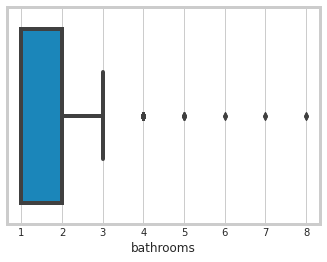

In [290]:
#53
import seaborn as sns
sns.boxplot(x=df['bathrooms'])



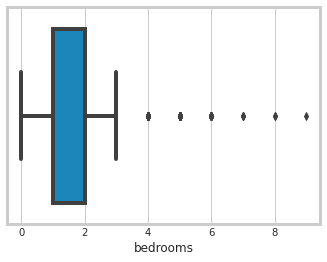

In [291]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      #54
sns.boxplot(x=df['bedrooms'])


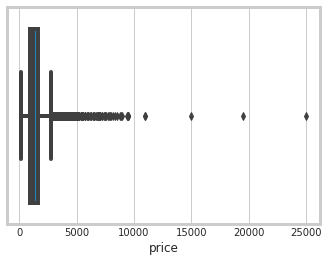

In [292]:
#55
sns.boxplot(x=df['price'])

In [293]:
#60
#x['bedrooms'].max()

df['bedrooms'].value_counts()

1    3858
2    2509
3    1107
4     385
0     175
5      84
6      15
7       3
8       2
9       1
Name: bedrooms, dtype: int64

From the above results it can be observed that bedrooms=6,7,8 has only two rows and its an outlier so we will delete these rows

In [294]:
df_bed = df[ df['bedrooms'] > 6 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2

In [295]:
df['bathrooms'].value_counts()

1    5586
2    2249
3     170
4     117
5       7
8       2
6       2
Name: bathrooms, dtype: int64

It can be seen from the above results that theres only 2 rows for 6 and 8 bathrooms each. So we can delete them to avoid outliers.

In [296]:
df_bed = df[ df['bathrooms'] > 5 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2
df['bathrooms'].value_counts()

1    5586
2    2249
3     170
4     117
5       7
Name: bathrooms, dtype: int64

In [297]:
df['square_feet'].value_counts()

700     151
600     135
250     129
800     128
900     122
       ... 
190       1
2215      1
2207      1
2187      1
2065      1
Name: square_feet, Length: 1662, dtype: int64

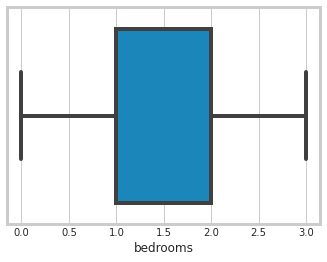

In [298]:
#61
sns.boxplot(x=x['bedrooms'])

In [301]:
df.head()

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,1,0,None,1390,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,1,0,None,925,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,1,0,None,1495,138,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,1,0,None,1695,190,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,1,1,"Cats,Dogs",1560,200,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


using visualization to see the relation between the variables

In [302]:
#62
df.columns = ['bathrooms'	,'bedrooms',	'pets_allowed','price','square_feet'	,	'cityname'	,'state'	,'latitude','longitude','source','time','Full_address']
df.index = df.price
bedrooms = df['bedrooms']





[]

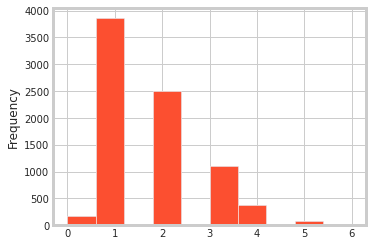

In [303]:
#63
bedrooms.plot(kind='hist')
#17
plt.hist(bedrooms)
plt.plot()


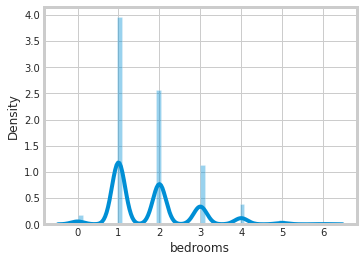

In [304]:
#63
sb.distplot(bedrooms)

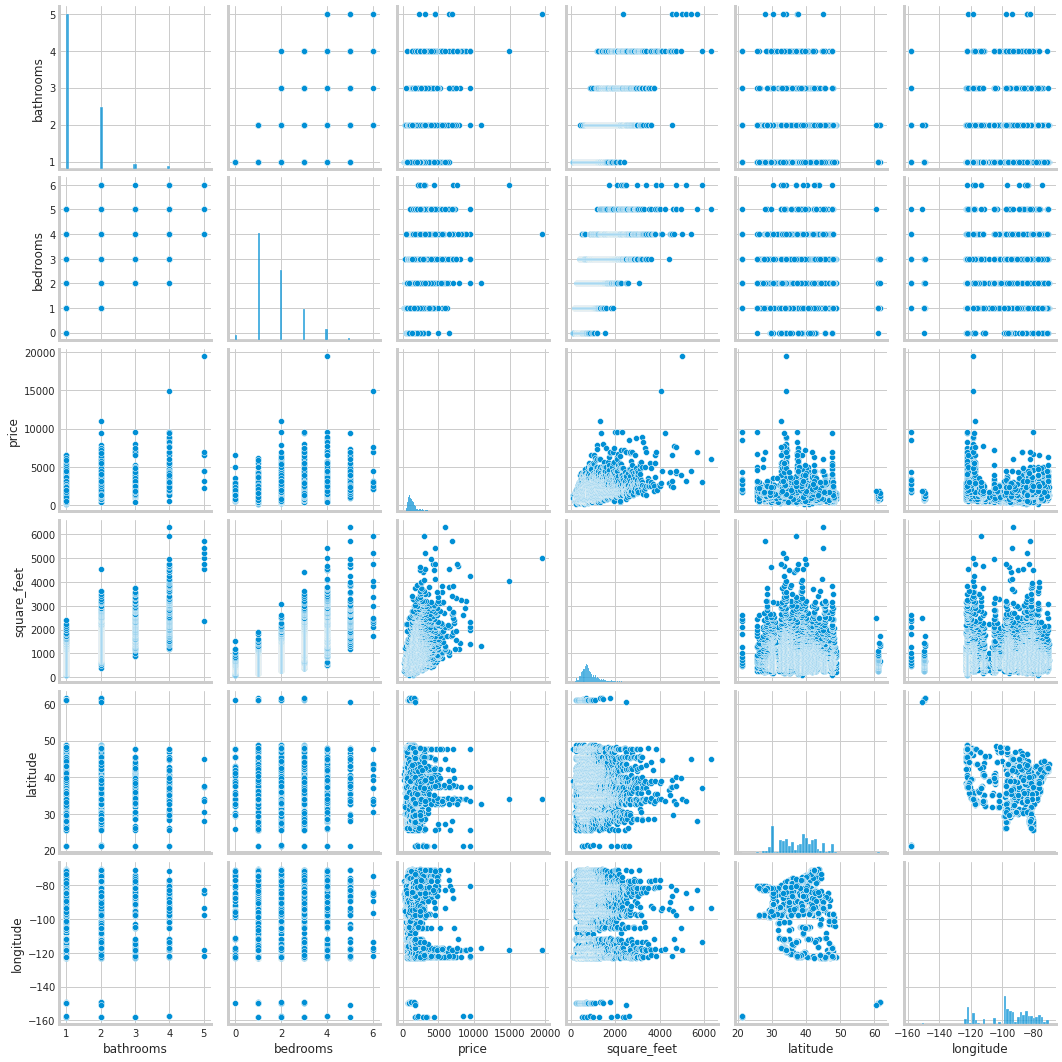

In [305]:
#64
sb.pairplot(df)

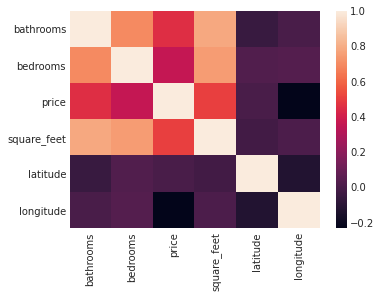

In [306]:
#65
df.corr()
sb.heatmap(df.corr())

In [307]:
#66
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   bathrooms     8129 non-null   float64       
 1   bedrooms      8129 non-null   float64       
 2   pets_allowed  8129 non-null   object        
 3   price         8129 non-null   int64         
 4   square_feet   8129 non-null   int64         
 5   cityname      8129 non-null   object        
 6   state         8129 non-null   object        
 7   latitude      8129 non-null   float64       
 8   longitude     8129 non-null   float64       
 9   source        8129 non-null   object        
 10  time          8129 non-null   datetime64[ns]
 11  Full_address  8129 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 825.6+ KB


Converting float to int type for bathrooms and bedrooms

In [308]:
#67
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors = 'coerce')
df['bathrooms'] = df['bathrooms'].astype('int64')

df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors = 'coerce')
df['bedrooms'] = df['bedrooms'].astype('int64')
pd.options.display.float_format = '{:,.0f}'.format
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   bathrooms     8129 non-null   int64         
 1   bedrooms      8129 non-null   int64         
 2   pets_allowed  8129 non-null   object        
 3   price         8129 non-null   int64         
 4   square_feet   8129 non-null   int64         
 5   cityname      8129 non-null   object        
 6   state         8129 non-null   object        
 7   latitude      8129 non-null   float64       
 8   longitude     8129 non-null   float64       
 9   source        8129 non-null   object        
 10  time          8129 non-null   datetime64[ns]
 11  Full_address  8129 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 825.6+ KB


In [309]:
#68
df.head()

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
price,,,,,,,,,,,,
1390,1,0,None,1390,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
925,1,0,None,925,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
1495,1,0,None,1495,138,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
1695,1,0,None,1695,190,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
1560,1,1,"Cats,Dogs",1560,200,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


# (ii) Scatter plot
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset. In a scatter plot, the dependent variable is marked on the x-axis and the independent variable is marked on the y-axis. In our case, the ‘SalePrice’ attribute is the dependent variable, and every other are the independent variables. It would be difficult to produce a plot for each variable, so we can define a function that takes only the dependent variable and returns a scatter plot for every independent variable present in a dataset.

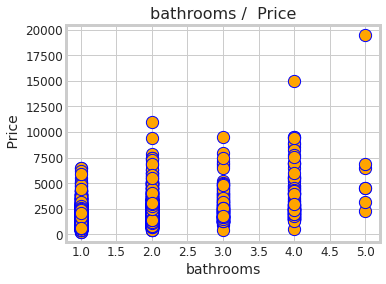

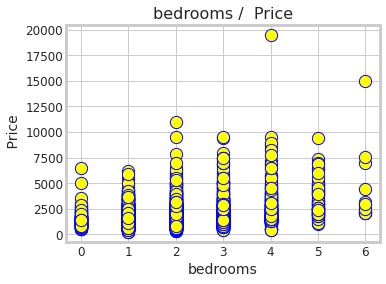

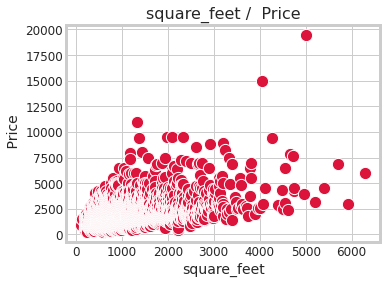

In [310]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
    
scatter_df('price')

# **(iii) Distribution Plot**
Distribution plots are very useful to check how well a variable is distributed in the dataset. Let’s now produce a distribution plot using the ‘distplot’ function to check the distribution of the ‘SalePrice’ variable in the dataset

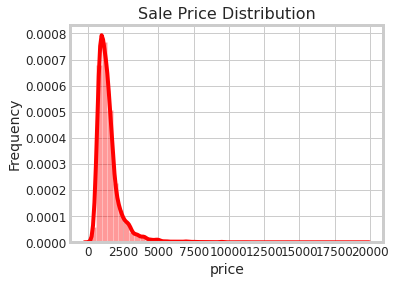

In [311]:

# 70. Distribution plot

sb.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [347]:
#80

number_df = df[['bathrooms', 'bedrooms', 'price', 'square_feet','time']]
string_df = df[['pets_allowed', 'cityname', 'state', 'source']]
number_df.head()

,bathrooms,bedrooms,price,square_feet,time
price,,,,,
1390,1,0,1390,107,2019-12-26 11:23:30
925,1,0,925,116,2019-12-18 11:15:43
1495,1,0,1495,138,2019-12-26 11:05:13
1695,1,0,1695,190,2019-12-22 11:45:21
1560,1,1,1560,200,2019-12-17 21:27:56


In [348]:
#81
string_df.describe()

,pets_allowed,cityname,state,source
count,8129,8129,8129,8129
unique,4,1436,51,10
top,"Cats,Dogs",Austin,TX,RentLingo
freq,5169,522,1555,6793


the interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [349]:

#56(corrcet numbering)
Q1 = number_df.quantile(0.25)
Q3 = number_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bathrooms       1
bedrooms        1
price         750
square_feet   475
dtype: float64


In [350]:
#67
number_df['bathrooms'] = pd.to_numeric(number_df['bathrooms'], errors = 'coerce')
number_df['bathrooms'] = number_df['bathrooms'].astype('int64')

number_df['bedrooms'] = pd.to_numeric(number_df['bedrooms'], errors = 'coerce')
number_df['bedrooms'] = number_df['bedrooms'].astype('int64')
pd.options.display.float_format = '{:,.0f}'.format
number_df.head()
number_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   bathrooms    8129 non-null   int64         
 1   bedrooms     8129 non-null   int64         
 2   price        8129 non-null   int64         
 3   square_feet  8129 non-null   int64         
 4   time         8129 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 381.0 KB


In [351]:
#57
print(number_df < (Q1 - 1.5 * IQR)) |(number_df > (Q3 + 1.5 * IQR))


TypeError: ignored

In [352]:
#58
number_df.shape


(8129, 5)

In [353]:

#59
number_df = number_df[~((number_df < (Q1 - 1.5 * IQR)) |(number_df > (Q3 + 1.5 * IQR))).any(axis=1)]
number_df.shape
number_df

TypeError: ignored

In [354]:
#62
number_df.columns = ['bathrooms'	,'bedrooms','price','square_feet','time']
number_df.index = number_df.price
bedrooms = number_df['bedrooms']

[]

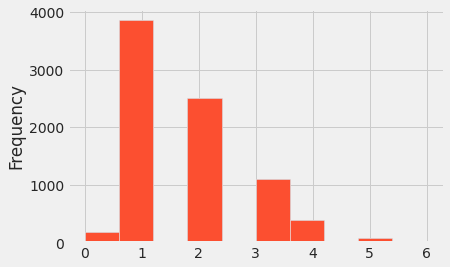

In [355]:
#63
bedrooms.plot(kind='hist')
#17
plt.hist(bedrooms)
plt.plot()


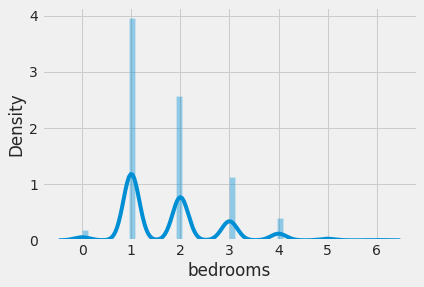

In [356]:
#63
sb.distplot(bedrooms)

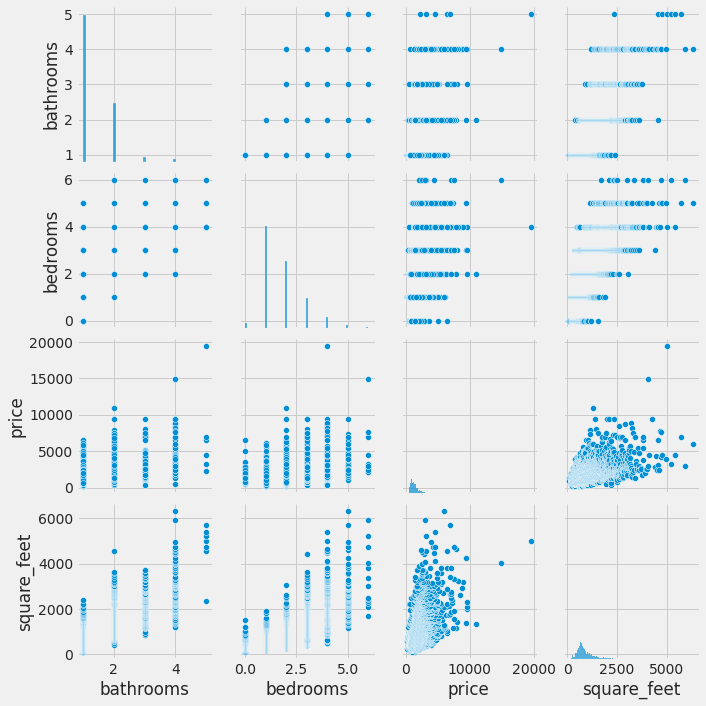

In [357]:
#64
sb.pairplot(number_df)

In [358]:
number_df.corr()

,bathrooms,bedrooms,price,square_feet
bathrooms,1,1,0,1
bedrooms,1,1,0,1
price,0,0,1,1
square_feet,1,1,1,1


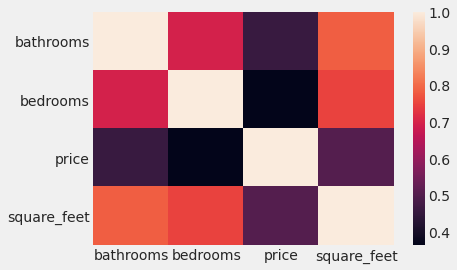

In [359]:
#65
number_df.corr()
sb.heatmap(number_df.corr())

scatter plot after removing the outliers

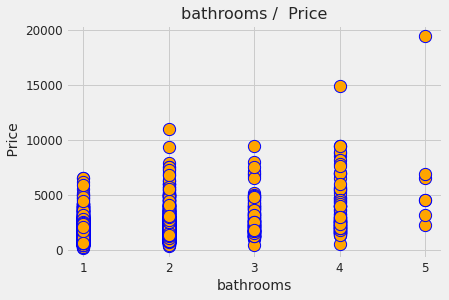

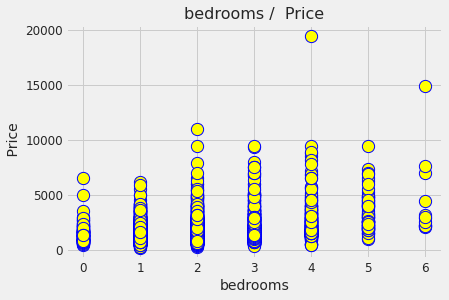

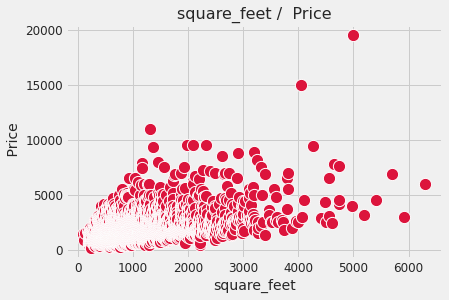

In [360]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = number_df.drop(y_var, axis = 1)
    i = number_df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot5 = sb.scatterplot(i[3], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
    
scatter_df('price')

# **EDA**

In [361]:
#27
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#28
street_map=gpd.read_file("/content/USA_States.shp")
fig,ax=plt.subplots(figsize=(10,10))
street_map.plot(ax=ax)
#29-1(KHALID)
'''geometry= [Point(xy) for xy in zip(df1["longitude"],df1["latitude"])]
geometry[:3]

#geometry.isnull().sum()
'''

#30
geometry= [Point(xy) for xy in zip(df["longitude"],df["latitude"])]
geometry[:3]
crs={"init":"epsg:4326"}
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

#31
ax = geo_df['geometry'].plot(markersize=8, figsize=(10,10))
street_map.plot(ax=ax,alpha=0.4,color="grey")


ERROR:fiona._env:/content/USA_States.shp: No such file or directory


DriverError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

**Measure of central tendency**

In [362]:

#82
string_df.mode()


,pets_allowed,cityname,state,source
0,"Cats,Dogs",Austin,TX,RentLingo


In [363]:
#83
# Mean: average value
number_df.mean()


bathrooms         1
bedrooms          2
price         1,461
square_feet     938
dtype: float64

In [364]:
# to_calculate.head()
#84
# Median: value in the middle of a sorted array
number_df.median()


bathrooms         1
bedrooms          2
price         1,250
square_feet     788
dtype: float64

In [365]:
#85

# Mode: most frequent value in column
number_df.mode()


,bathrooms,bedrooms,price,square_feet,time
0,1,1,"1,350",700,2019-12-22 12:14:26
1,nan,nan,nan,nan,2019-12-26 11:20:51
2,nan,nan,nan,nan,2019-12-26 11:24:49


In [366]:
#86
# Standard deviation (SD) = variance^0.5
number_df.std()

bathrooms       1
bedrooms        1
price         909
square_feet   537
dtype: float64

Using facebook proophet to check trend

In [367]:
#71
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from pandas import datetime

import fbprophet
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot
from pandas import read_csv

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [368]:
#72
df_fb=number_df[["time","price"]]
df_fb.reset_index(drop=True, inplace=True)
df_fb

,time,price
0,2019-12-26 11:23:30,1390
1,2019-12-18 11:15:43,925
2,2019-12-26 11:05:13,1495
3,2019-12-22 11:45:21,1695
4,2019-12-17 21:27:56,1560
...,...,...
8124,2019-12-26 11:41:29,3200
8125,2019-12-18 11:14:52,4500
8126,2019-12-26 11:24:02,6900
8127,2019-12-22 12:18:23,3000


remove time from time column

In [369]:
#73
df_fb['time'] = pd.to_datetime(df_fb['time']).dt.date
df_fb

,time,price
0,2019-12-26,1390
1,2019-12-18,925
2,2019-12-26,1495
3,2019-12-22,1695
4,2019-12-17,1560
...,...,...
8124,2019-12-26,3200
8125,2019-12-18,4500
8126,2019-12-26,6900
8127,2019-12-22,3000


In [370]:
#74
df_fb.rename(columns={'time': 'ds', 'price': 'y'}, inplace=True)

In [371]:
#75
m = Prophet()
m.fit(df_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [372]:
#76
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
389,2020-12-21
390,2020-12-22
391,2020-12-23
392,2020-12-24
393,2020-12-25


In [373]:
#77 Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
389,2020-12-21,"2,593","1,421","3,730"
390,2020-12-22,"2,790","1,662","3,998"
391,2020-12-23,"2,747","1,543","3,852"
392,2020-12-24,"2,439","1,305","3,603"
393,2020-12-25,"2,721","1,566","3,946"


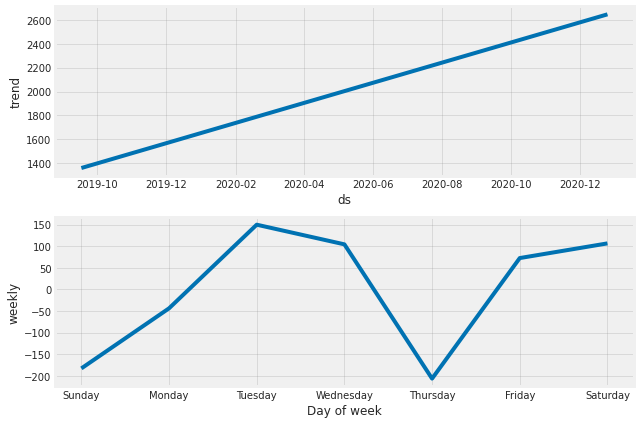

In [374]:
#78
fig2 = m.plot_components(forecast)

# ITERATION 2 OF PROHPHETPROPHET 

In [375]:
#79
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
from fbprophet import Prophet
import squarify

ModuleNotFoundError: ignored